In [78]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(vegan)
library("lubridate")
library('PCAtools')
library("DESeq2")
library("GGally")
library("ggpmisc")
library(patchwork)

In [79]:
#load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_treatment_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")


In [81]:
#load metadata
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

head(meta, n=2)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-590,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


In [82]:
## taxonomy and counts as matrices
taxo_mat <- as.matrix(POR_taxo_4_analysis)
count_mat <- as.matrix(POR_counts_4_analysis)

In [83]:
#make phyloseq object
ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(taxo_mat)
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27534 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 27534 taxa by 7 taxonomic ranks ]

In [7]:
#list of ASVs that Blasted as Eukaryote
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps)
# new phyloseq object with removed eukaryotes 
ps_fill_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27486 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 27486 taxa by 7 taxonomic ranks ]

In [8]:
#summary of data
microbiome::summarize_phyloseq(ps)

Compositional = NO2

1] Min. number of reads = 4932] Max. number of reads = 2660663] Total number of reads = 194734094] Average number of reads = 53645.75482093665] Median number of reads = 395717] Sparsity = 0.9856791934827226] Any OTU sum to 1 or less? YES8] Number of singletons = 679] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)0.14528020920350110] Number of sample variables are: 54collection_dateSpeed.cm.s.Bearing.degrees.Velocity.N.cm.s.Velocity.E.cm.s.Temperature.C.reefGenotypeFragment_numberMonthYearFragment_numdaySurvey.LiveFragLWHAdjusted.AreaS01FragCountYear.xSi.uM.NO2.uM.N.N.uM.NO3.uM.PO4.uM.sample_IDsample_ID2HealthMonth.xSamp_tripjoining_infoorderspeciestime_ReefClustersampling_tripXcolour_reefcolour_genotypecolour_reef_genotypecolour_timepointcolour_timepoint_reefcluster_latitudecluster_longitudecluster_depthYear.yMonth.yLat_decimalLong_decimalavgchla_mgm.3sdchla_mgm.3avgSST_degCsdSST_degC2



[[1]]
[1] "1] Min. number of reads = 493"

[[2]]
[1] "2] Max. number of reads = 266066"

[[3]]
[1] "3] Total number of reads = 19473409"

[[4]]
[1] "4] Average number of reads = 53645.7548209366"

[[5]]
[1] "5] Median number of reads = 39571"

[[6]]
[1] "7] Sparsity = 0.985679193482722"

[[7]]
[1] "6] Any OTU sum to 1 or less? YES"

[[8]]
[1] "8] Number of singletons = 67"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0.145280209203501"

[[10]]
[1] "10] Number of sample variables are: 54"

[[11]]
 [1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "Year.y"                "Month.y"              
[49] "Lat_decimal"           "Long_decimal"          "avgchla_mgm.3"        
[52] "sdchla_mgm.3"          "avgSST_degC"           "sdSST_degC"

In [84]:
#filter to remove noise from data
ps_fill = filter_taxa(ps_fill_euk, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill
#summarize filtration
microbiome::summarize_phyloseq(ps_fill)                      

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 375 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 375 taxa by 7 taxonomic ranks ]

Compositional = NO2

1] Min. number of reads = 4592] Max. number of reads = 2578903] Total number of reads = 152136104] Average number of reads = 41910.77134986235] Median number of reads = 313047] Sparsity = 0.6539136822773196] Any OTU sum to 1 or less? NO8] Number of singletons = 09] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)010] Number of sample variables are: 54collection_dateSpeed.cm.s.Bearing.degrees.Velocity.N.cm.s.Velocity.E.cm.s.Temperature.C.reefGenotypeFragment_numberMonthYearFragment_numdaySurvey.LiveFragLWHAdjusted.AreaS01FragCountYear.xSi.uM.NO2.uM.N.N.uM.NO3.uM.PO4.uM.sample_IDsample_ID2HealthMonth.xSamp_tripjoining_infoorderspeciestime_ReefClustersampling_tripXcolour_reefcolour_genotypecolour_reef_genotypecolour_timepointcolour_timepoint_reefcluster_latitudecluster_longitudecluster_depthYear.yMonth.yLat_decimalLong_decimalavgchla_mgm.3sdchla_mgm.3avgSST_degCsdSST_degC2



[[1]]
[1] "1] Min. number of reads = 459"

[[2]]
[1] "2] Max. number of reads = 257890"

[[3]]
[1] "3] Total number of reads = 15213610"

[[4]]
[1] "4] Average number of reads = 41910.7713498623"

[[5]]
[1] "5] Median number of reads = 31304"

[[6]]
[1] "7] Sparsity = 0.653913682277319"

[[7]]
[1] "6] Any OTU sum to 1 or less? NO"

[[8]]
[1] "8] Number of singletons = 0"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0"

[[10]]
[1] "10] Number of sample variables are: 54"

[[11]]
 [1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "Year.y"                "Month.y"              
[49] "Lat_decimal"           "Long_decimal"          "avgchla_mgm.3"        
[52] "sdchla_mgm.3"          "avgSST_degC"           "sdSST_degC"

In [13]:
# transform data into relative abundance and ordinate
ps_ra <- microbiome::transform(ps_fill, 'compositional')
psr_ra_ord <- ordinate(ps_ra, "NMDS", "bray")

Run 0 stress 0.2526891 
Run 1 stress 0.2558755 
Run 2 stress 0.2554432 
Run 3 stress 0.2548496 
Run 4 stress 0.2571433 
Run 5 stress 0.261824 
Run 6 stress 0.2617829 
Run 7 stress 0.257345 
Run 8 stress 0.2569314 
Run 9 stress 0.259125 
Run 10 stress 0.256073 
Run 11 stress 0.2600643 
Run 12 stress 0.2554777 
Run 13 stress 0.2541345 
Run 14 stress 0.255094 
Run 15 stress 0.2557815 
Run 16 stress 0.2540459 
Run 17 stress 0.2589064 
Run 18 stress 0.2653927 
Run 19 stress 0.2588738 
Run 20 stress 0.2597401 
*** Best solution was not repeated -- monoMDS stopping criteria:
    19: no. of iterations >= maxit
     1: stress ratio > sratmax


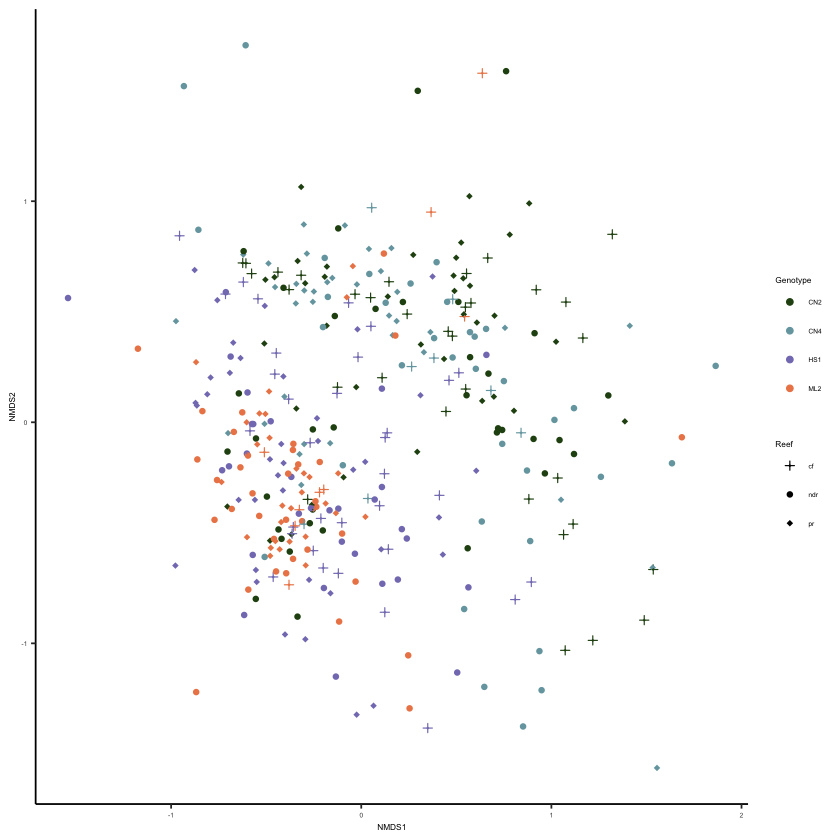

In [99]:
ord_bray = plot_ordination(ps_ra, psr_ra_ord,
                               color="Genotype",
                              shape="reef",
                            axes = c(1,2)) +
geom_point(size = .01) +
scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
theme_classic() +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) 
ord_bray
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/ord_bray.png", width = 4, height = 4, units = "in", dpi=300)     

In [101]:

#dispersion
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 

#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
#permutest(mod_geno, pairwise = TRUE, permutations = 999)




#results: only  CN4-CN2 are not different


[1] 363   1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                diff         lwr          upr     p adj
CN4-CN2 -0.006744507 -0.05600244  0.042513427 0.9848419
HS1-CN2 -0.062442122 -0.10839432 -0.016489921 0.0028576
ML2-CN2 -0.146885506 -0.19689337 -0.096877640 0.0000000
HS1-CN4 -0.055697615 -0.10546569 -0.005929545 0.0212822
ML2-CN4 -0.140140999 -0.19367643 -0.086605565 0.0000000
ML2-HS1 -0.084443384 -0.13495381 -0.033932954 0.0001211


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


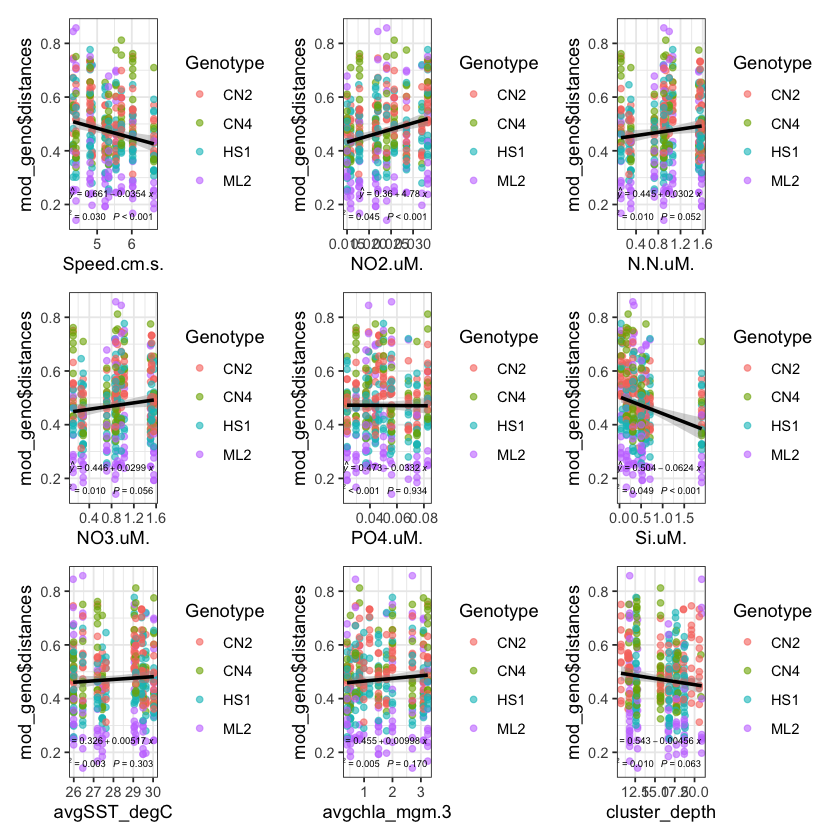

In [107]:
ps_ra_meta= as(sample_data(ps_ra), "data.frame")
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3", "cluster_depth")

y_columns <- names(ps_ra_meta_envs[4:12])
# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes( x = .data[[y_var]],y = mod_geno$distances, color = Genotype)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

[1] 363   1

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,mod_geno$distances
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.1970187
bagnumber-1010,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2417280


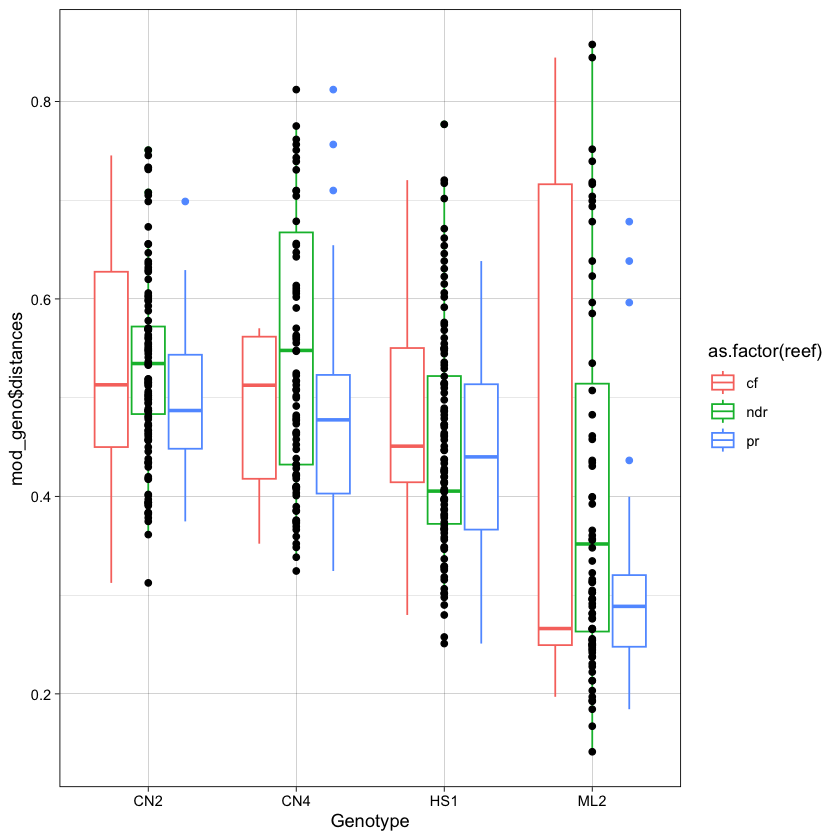

In [111]:
mod_dist_geno= as.data.frame(mod_geno$distances)
dim(mod_dist_geno)

mod_dist_geno_df=cbind(sample_data(ps_ra), mod_dist_geno) 
head(mod_dist_geno_df, n=2)



ggplot(mod_dist_geno_df,
       aes(x=Genotype, y=mod_geno$distances)) +
geom_boxplot(aes(color=as.factor(reef))) +
geom_point() +
theme_linedraw() 

In [19]:
#dates <- unique(sort(mod_dist_geno_df$collection_date))
#mod_dist_geno_df$collection_date <- factor(mod_dist_geno_df$collection_date,labels = dates, ordered = T)
#head(mod_dist_geno_df)


	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$reef)

No. of Positive Eigenvalues: 144
No. of Negative Eigenvalues: 218

Average distance to median:
    cf    ndr     pr 
0.5161 0.5129 0.4813 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
21.924 15.059  9.879  6.897  6.329  5.284  4.002  3.448 

[1] 363   1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
               diff         lwr         upr     p adj
ndr-cf -0.003249152 -0.04138403 0.034885726 0.9780796
pr-cf  -0.034833660 -0.07276628 0.003098961 0.0793828
pr-ndr -0.031584508 -0.06440160 0.001232585 0.0621231



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)  
Groups      2 0.0936 0.046791 3.4385    999  0.037 *
Residuals 360 4.8989 0.013608                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
          cf      ndr    pr
cf           0.856000 0.033
ndr 0.842313          0.030
pr  0.025047 0.028277      

ERROR: Error in `[.data.frame`(ps_ra_meta_envs, 4:14): undefined columns selected


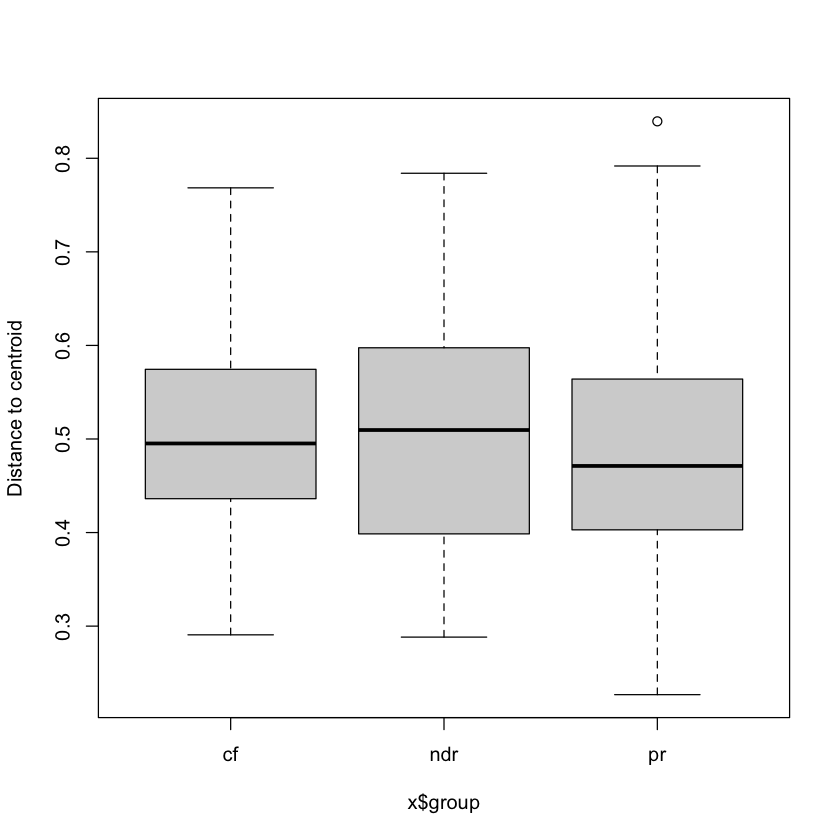

In [115]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$reef)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 

#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)



y_columns <- names(ps_ra_meta_envs[4:14])

# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = reef)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Now, you have a list of plots, and you can access them using y_columns
# For example, to access the plot for the first y variable:
plots[[y_columns[6]]]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


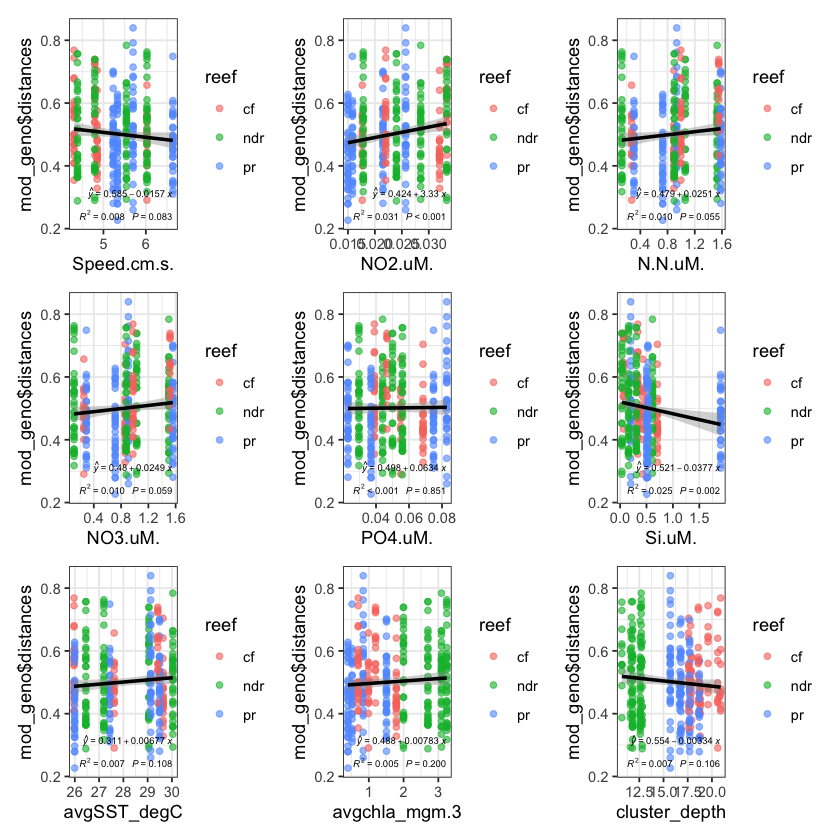

In [116]:
library(ggplot2)
library(ggpmisc)
library(patchwork)

# Assuming your data frame is named mod_dist_geno_df
# You may need to adjust the column names and other details based on your actual data structure

# Extract column names except for the first column (assuming it's the x variable)


# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes( x = .data[[y_var]], y = mod_geno$distances, color = reef)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)



	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$Samp_trip)

No. of Positive Eigenvalues: 144
No. of Negative Eigenvalues: 218

Average distance to median:
Trip_2 Trip_3 Trip_4 Trip_5 
0.4849 0.4859 0.5307 0.4962 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
21.924 15.059  9.879  6.897  6.329  5.284  4.002  3.448 

[1] 363   1

,mod_geno$distances
,<dbl>
bagnumber-1009,0.3617699
bagnumber-1010,0.3734951
bagnumber-1011,0.5061981
bagnumber-1013,0.3944143
bagnumber-1014,0.5378841
bagnumber-1015,0.5568178


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                      diff           lwr        upr     p adj
Trip_3-Trip_2  0.001002354 -0.0421096614 0.04411437 0.9999223
Trip_4-Trip_2  0.045744342  0.0001262779 0.09136241 0.0490730
Trip_5-Trip_2  0.011238939 -0.0329440949 0.05542197 0.9131997
Trip_4-Trip_3  0.044741987 -0.0007714858 0.09025546 0.0560043
Trip_5-Trip_3  0.010236584 -0.0338384533 0.05431162 0.9321756
Trip_5-Trip_4 -0.034505403 -0.0810346499 0.01202384 0.2238989



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)  
Groups      3 0.1155 0.038493 2.8303    999  0.034 *
Residuals 359 4.8825 0.013600                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
          Trip_2    Trip_3    Trip_4 Trip_5
Trip_2           0.9430000 0.0150000  0.511
Trip_3 0.9501839           0.0120000  0.517
Trip_4 0.0179042 0.0098461            0.068
Trip_5 0.5228906 0.5133087 0.0688793       

ERROR: Error in `[.data.frame`(ps_ra_meta_envs, 4:13): undefined columns selected


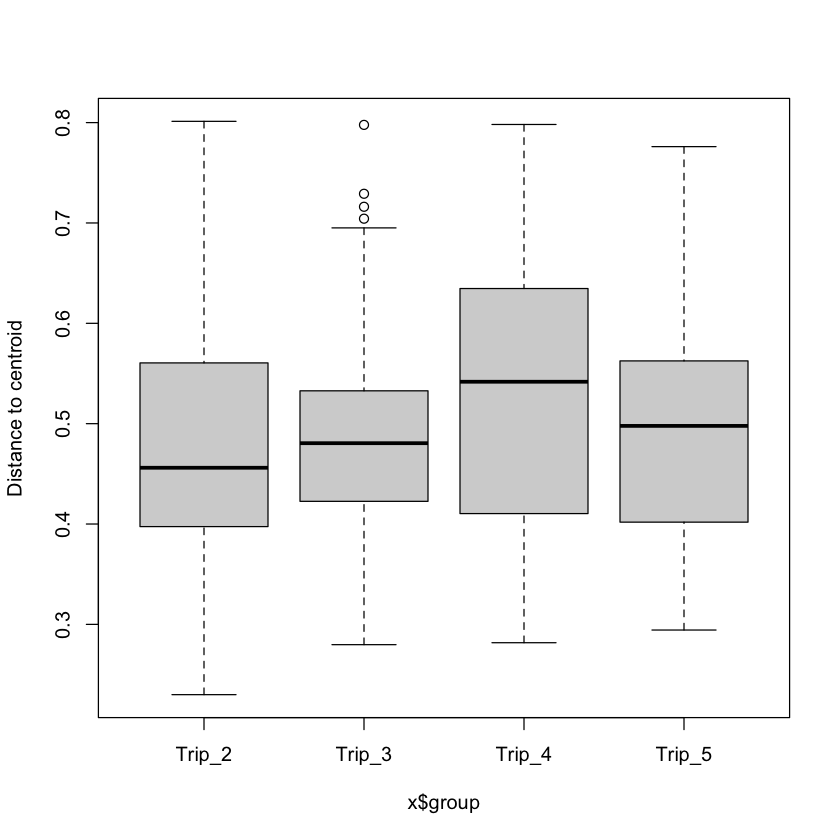

In [113]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$Samp_trip)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 
head(mod_dist)

#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)




y_columns <- names(ps_ra_meta_envs[4:13])

# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = Samp_trip)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Now, you have a list of plots, and you can access them using y_columns
# For example, to access the plot for the first y variable:
plots[[y_columns[6]]]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


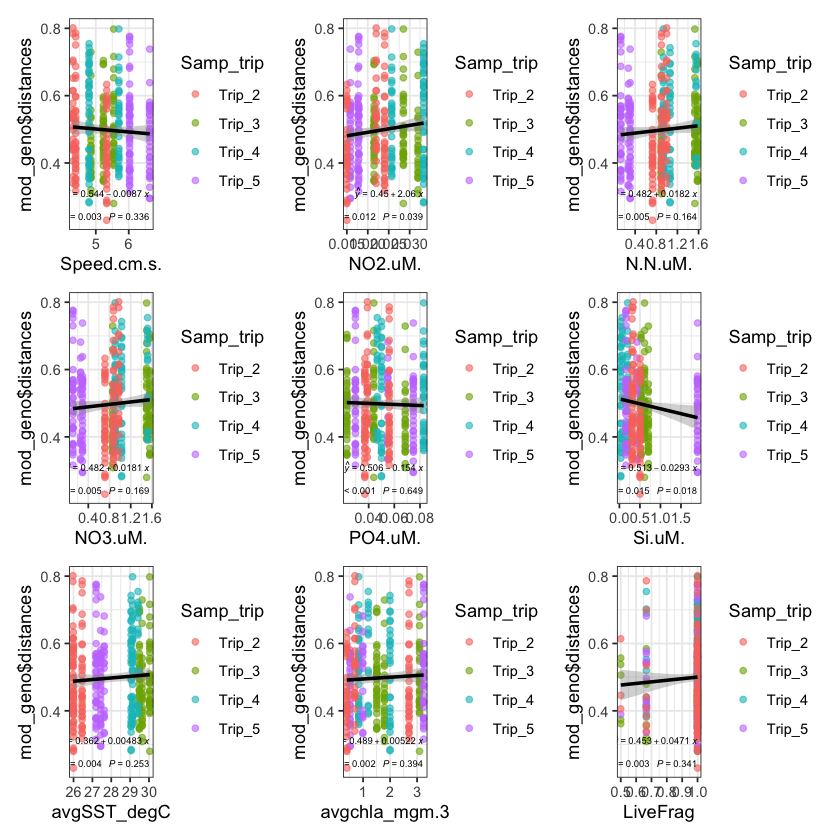

In [25]:
library(ggplot2)
library(ggpmisc)
library(patchwork)

# Assuming your data frame is named mod_dist_geno_df
# You may need to adjust the column names and other details based on your actual data structure

# Extract column names except for the first column (assuming it's the x variable)


# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = .data[[y_var]], y= mod_geno$distances, color = Samp_trip)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

In [23]:
ps_ra_df=as.data.frame(otu_table(ps_ra))
ps_ra_meta= as(sample_data(ps_ra), "data.frame")


In [24]:
  p <- pca(ps_ra_df, metadata =ps_ra_meta, 
           removeVar = 0.1)

-- removing the lower 10% of variables based on variance



In [25]:
colnames(ps_ra_meta)

[1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "Year.y"                "Month.y"              
[49] "Lat_decimal"           "Long_decimal"          "avgchla_mgm.3"        
[52] "sdchla_mgm.3"          "avgSST_degC"           "sdSST_degC"

Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“Samp_trip is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“reef is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“Genotype is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.def

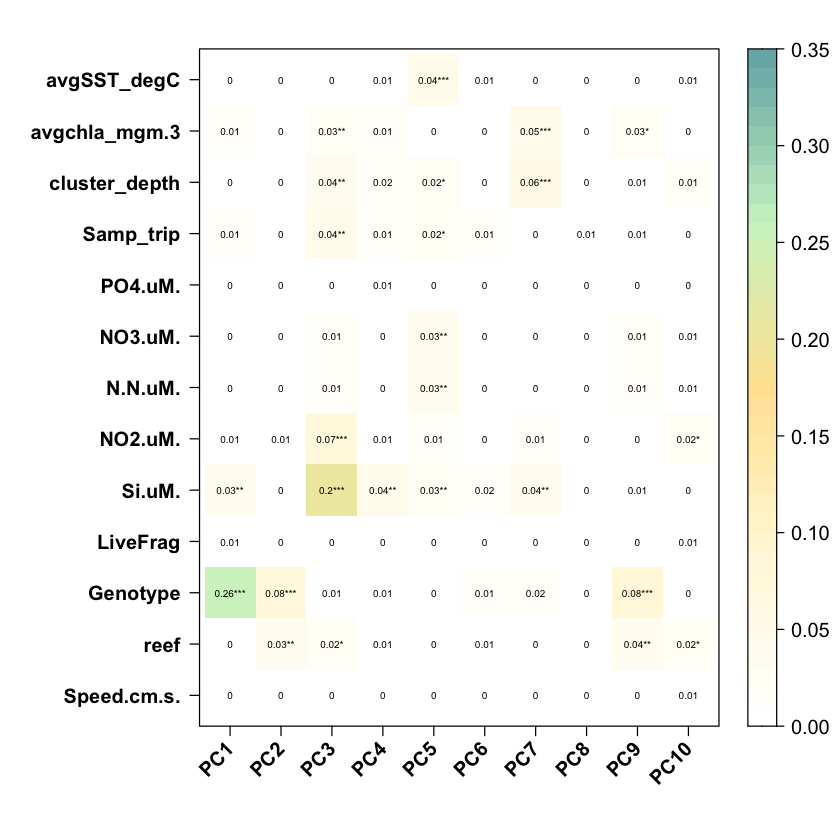

In [27]:
 eigencorplot(p,
    metavars = c('Si.uM.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', "Samp_trip", "avgchla_mgm.3", "reef", "Genotype",
                "Speed.cm.s.", "avgSST_degC", 'cluster_depth',
                "LiveFrag"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')

In [118]:
meta_envs= meta %>%
select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "cluster_depth","avgchla_mgm.3","LiveFrag")
head(meta_envs, n=2)

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,cluster_depth,avgchla_mgm.3,LiveFrag
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,15.7,0.3999531,1
bagnumber-590,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,16.7,0.3999531,1


In [30]:
library("GGally")

Warning message in ggcorr(meta_envs, geom = "circle", nbreaks = 5):
“data in column(s) 'Genotype', 'Samp_trip', 'reef' are not numeric and were ignored”


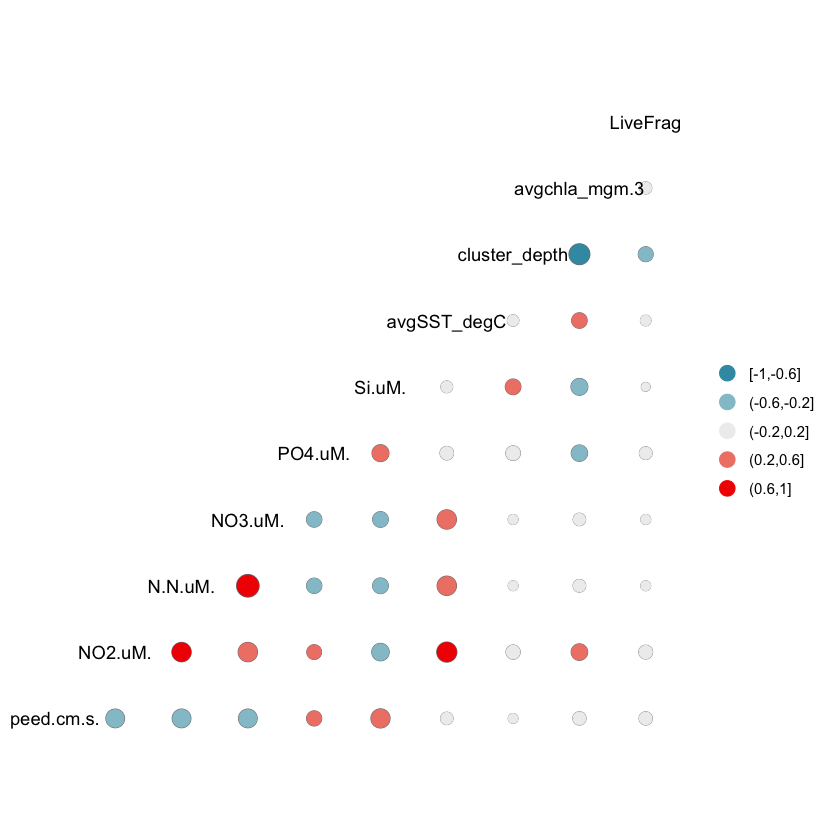

In [119]:
ggcorr(meta_envs, geom = "circle", nbreaks = 5) +
colors = c("#6D9EC1", "white", "#E46726"))

In [46]:
head(meta_envs)
dim(meta_envs)

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,LiveFrag,Temperature.C.,cluster_depth
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619,15.7
bagnumber-590,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619,16.7
bagnumber-593,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619,17.7
bagnumber-585,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619,15.7
bagnumber-591,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619,16.7
bagnumber-594,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619,17.7


[1] 363  14

In [172]:
meta_envs_ad = meta_envs %>%
filter(cluster_depth!= "NA")
dim(meta_envs_ad)
head(meta_envs_ad)
#removing ("CN1_Cluster_17_4_ndr","CN2_Cluster_65_4_pr","CN2_Cluster_65_5_pr","CN2_Cluster_65_6_pr"))

[1] 359  13

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,cluster_depth,avgchla_mgm.3,LiveFrag
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,15.7,0.3999531,1
bagnumber-590,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,16.7,0.3999531,1
bagnumber-593,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,17.7,0.3999531,1
bagnumber-585,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,15.7,0.3999531,1
bagnumber-591,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,16.7,0.3999531,1
bagnumber-594,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,17.7,0.3999531,1


In [57]:
ps_ra_ad =  subset_samples(ps_ra, cluster_depth!= "NA")
#ps_ra_ad
#distances between
ps_veg_ad <- vegdist(otu_table(t(ps_ra_ad)), method ="bray")
#  adonis(formula = abund_table ~ ., data = meta_table) 

adonis2(ps_veg_ad~., 
       data =meta_envs_ad, 
         method = "bray", permutations = 999)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Genotype,3,1.06853847,0.0108846926,1.4040192,0.070
Samp_trip,3,2.76857659,0.0282021716,3.6378052,0.001
reef,2,1.93473553,0.0197082297,3.8132542,0.001
Speed.cm.s.,1,0.89478072,0.0091147052,3.5271243,0.001
NO2.uM.,1,0.57263788,0.0058331895,2.2572737,0.029
N.N.uM.,1,2.70783791,0.0275834555,10.6739905,0.001
NO3.uM.,1,0.30646498,0.0031218129,1.2080503,0.282
PO4.uM.,1,0.46604990,0.0047474284,1.8371159,0.055
Si.uM.,1,0.08664596,0.0008826211,0.3415486,0.990


In [ ]:
adonis2(ps_veg~Genotype, 
       data =ps_ra_meta, permutations = 999, 
         method = "bray")

In [175]:
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3","LiveFrag", "Temperature.C.","cluster_depth")

In [59]:
dim(ps_ra_meta_envs)
head(ps_ra_meta_envs)

[1] 363  14

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,LiveFrag,Temperature.C.,cluster_depth
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801,20.9
bagnumber-1010,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801,20.9
bagnumber-1011,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801,20.9
bagnumber-1013,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,1.0,30.40801,17.9
bagnumber-1014,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801,17.9
bagnumber-1015,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801,17.9


In [60]:
dim(otu_table(ps_ra))

[1] 375 363

In [63]:
#find correlations in metadata
c1 <- cor(meta_envs_ad[4:14])
c1

,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,cluster_depth,avgchla_mgm.3,LiveFrag,Temperature.C.
Speed.cm.s.,1.00000000,-0.5279219,-0.53024424,-0.52783365,0.2244871,0.578462607,0.08217207,0.01295761,-0.11648418,0.1189599932,0.2407992109
NO2.uM.,-0.52792194,1.0000000,0.60465629,0.59659994,0.2034929,-0.407827065,0.68092521,-0.16696211,0.33388199,-0.1503287889,0.4656920500
N.N.uM.,-0.53024424,0.6046563,1.00000000,0.99994839,-0.2436259,-0.266850618,0.59751858,0.01372147,0.09091364,0.0143548758,0.5047079732
NO3.uM.,-0.52783365,0.5965999,0.99994839,1.00000000,-0.2485099,-0.263565713,0.59320602,0.01569870,0.08736082,0.0163912291,0.5025777353
PO4.uM.,0.22448714,0.2034929,-0.24362590,-0.24850992,1.0000000,0.382109875,0.12455568,0.18933037,-0.31320792,-0.1021718172,0.2713086210
Si.uM.,0.57846261,-0.4078271,-0.26685062,-0.26356571,0.3821099,1.000000000,-0.05427562,0.26671097,-0.36412157,-0.0019015892,0.4285835302
avgSST_degC,0.08217207,0.6809252,0.59751858,0.59320602,0.1245557,-0.054275617,1.00000000,-0.05047391,0.26077225,-0.0305284625,0.8570156911
cluster_depth,0.01295761,-0.1669621,0.01372147,0.01569870,0.1893304,0.266710968,-0.05047391,1.00000000,-0.77555147,-0.2150608210,0.0533895162
avgchla_mgm.3,-0.11648418,0.3338820,0.09091364,0.08736082,-0.3132079,-0.364121566,0.26077225,-0.77555147,1.00000000,0.0723490960,0.0493714323
LiveFrag,0.11895999,-0.1503288,0.01435488,0.01639123,-0.1021718,-0.001901589,-0.03052846,-0.21506082,0.07234910,1.0000000000,-0.0005831746


In [177]:
head(meta_envs_ad)

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,cluster_depth,avgchla_mgm.3,LiveFrag
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,15.7,0.3999531,1
bagnumber-590,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,16.7,0.3999531,1
bagnumber-593,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,17.7,0.3999531,1
bagnumber-585,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,15.7,0.3999531,1
bagnumber-591,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,16.7,0.3999531,1
bagnumber-594,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,17.7,0.3999531,1


In [178]:
#remove co-variate
ps_ra_meta_envs2 = meta_envs_ad %>% select('NO2.uM.', 'N.N.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3", "LiveFrag", "cluster_depth") %>%
rename('NO2.uM.' = expression("NH[4]"  )) 

head(ps_ra_meta_envs2)

ERROR: Error in rename(., NO2.uM. = expression("NH[4]")): arguments in '...' must be character and not NA


In [148]:
colnames(meta_envs_ad)[colnames(meta_envs_ad)=="NO2.uM."] <- expression("NO^[-1]")


In [69]:
#run ordistep for model selection
set.seed(43)
mod0 <- cca(t(otu_table(ps_ra_ad)) ~ 1, ps_ra_meta_envs2)
# Model with all explanatory variables
mod1 <- cca(t(otu_table(ps_ra_ad)) ~ ., ps_ra_meta_envs2)
## With scope present, the default direction is "both"
m <- ordistep(mod0, scope = formula(mod1), perm.max = 200, direction ="forward")
m


Start: t(otu_table(ps_ra_ad)) ~ 1 

                Df    AIC      F Pr(>F)   
+ avgchla_mgm.3  1 865.58 2.4343  0.005 **
+ N.N.uM.        1 866.02 1.9877  0.005 **
+ cluster_depth  1 866.04 1.9700  0.005 **
+ Speed.cm.s.    1 866.11 1.9061  0.005 **
+ NO2.uM.        1 866.58 1.4366  0.015 * 
+ avgSST_degC    1 866.62 1.3916  0.020 * 
+ Si.uM.         1 866.62 1.3941  0.105   
+ PO4.uM.        1 866.78 1.2356  0.115   
+ LiveFrag       1 867.38 0.6313  0.930   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: t(otu_table(ps_ra_ad)) ~ avgchla_mgm.3 

                Df    AIC      F Pr(>F)   
+ N.N.uM.        1 865.47 2.0986  0.005 **
+ Speed.cm.s.    1 865.50 2.0718  0.005 **
+ NO2.uM.        1 865.95 1.6218  0.005 **
+ cluster_depth  1 865.73 1.8379  0.010 **
+ Si.uM.         1 865.97 1.5974  0.025 * 
+ avgSST_degC    1 866.27 1.3021  0.095 . 
+ PO4.uM.        1 866.55 1.0232  0.385   
+ LiveFrag       1 866.97 0.6068  0.960   
---
Signif. codes:  0 ‘***’ 0.0

Call: cca(formula = t(otu_table(ps_ra_ad)) ~ avgchla_mgm.3 + N.N.uM. +
cluster_depth + Speed.cm.s. + Si.uM. + PO4.uM. + avgSST_degC, data =
ps_ra_meta_envs2)

               Inertia Proportion Rank
Total         11.09767    1.00000     
Constrained    0.38529    0.03472    7
Unconstrained 10.71239    0.96528  351
Inertia is scaled Chi-square 

Eigenvalues for constrained axes:
   CCA1    CCA2    CCA3    CCA4    CCA5    CCA6    CCA7 
0.11214 0.06721 0.05658 0.05228 0.04421 0.03080 0.02207 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.6619 0.5684 0.5070 0.4858 0.4642 0.4600 0.4401 0.4162 
(Showing 8 of 351 unconstrained eigenvalues)


In [70]:
vif.cca(m)

avgchla_mgm.3       N.N.uM. cluster_depth   Speed.cm.s.        Si.uM. 
     4.580478      6.239522      3.289748      4.624991      2.201071 
      PO4.uM.   avgSST_degC 
     2.143018      5.399899

In [75]:
#cca ordination
cca_ps <- ordinate(
  physeq = ps_ra_ad, 
  method = "CCA",
 distance = bray,
  formula =   ~  N.N.uM. +
cluster_depth + Speed.cm.s. + Si.uM. + PO4.uM. + avgSST_degC)

In [184]:
?replace

replace {base},R Documentation
x,vector
list,an index vector
values,replacement values


In [201]:
arrowdf %>%
mutate(across('labels', str_replace, "avgSST_degC" , "Temperature")) %>%
mutate(across('labels', str_replace, "cluster_depth" , "Depth"))


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across("labels", str_replace, "avgSST_degC", "Temperature")`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


,labels,CCA1,CCA2
,<chr>,<dbl>,<dbl>
N.N.uM.,N.N.uM.,0.37168395,0.5013898
cluster_depth,cluster_depth,0.89076985,-0.1091940
Speed.cm.s.,Speed.cm.s.,-0.15807423,-0.1145339
Si.uM.,Si.uM.,0.19537126,-0.5303111
PO4.uM.,PO4.uM.,0.08544711,0.2257819
avgSST_degC,Temperature,0.02034086,0.7510653


In [163]:
library(ggtext)

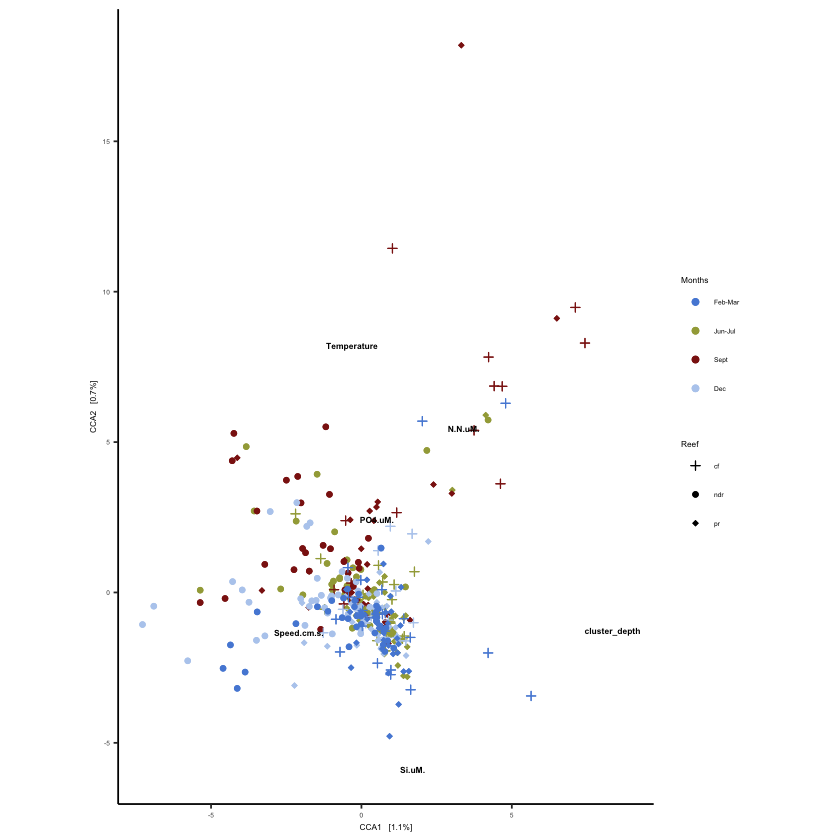

In [202]:
#lab1 <- c(expression(Ambient),
 #         expression(NH[4]  ), 
  #        expression(NH[4] + PO[4])) 

lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Dec")
p0 = plot_ordination(ps_ra_ad, cca_ps, color = "Samp_trip", shape ="reef") +
geom_point() +
scale_color_manual("Months", values=c("#558bd9", "#a3a847", "#8c1c13", "#b6cdee"), , labels= lab1)
# Now add the environmental variables as arrows
arrowmat = vegan::scores(cca_ps, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat) %>%
mutate(across('labels', str_replace, "avgSST_degC" , "Temperature"))
# Define the arrow aesthetic mapping
arrow_map = aes(xend = CCA1, yend = CCA2, x = 0, y = 0, shape = NULL, color = NULL, 
    label = labels)
label_map = aes(x = 10 * CCA1, y = 11 * CCA2, shape = NULL, color = NULL, 
    label = labels)
# Make a new graphic
arrowhead = arrow(length = unit(1,"cm"))
p1 = p0 +
#geom_segment(arrow_map, size = 0.3, data = arrowdf, color = "black", 
 #   arrow = arrowhead) + 

geom_text(label_map, size = 1.8, data = arrowdf ,fontface = "bold", hjust=0.8, vjust=0.8, angle=0) +
theme_classic() +
scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
  coord_fixed() 
p1

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/cca.png",
      width = 4, height = 4, units = "in", dpi=300)